In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
# from networkx.algorithms.approximation import dominating_set





In [204]:
random.seed(42)
x_vals = random.sample(range(1, 10), 5)
y_vals = random.sample(range(1, 10), 5)
z_vals = [0]*5

coordinates = list(zip(x_vals,y_vals,z_vals))

In [205]:
coordinates

[(2, 4, 0), (1, 3, 0), (6, 6, 0), (3, 1, 0), (9, 5, 0)]

In [206]:
A = np.array(coordinates)
print(A)

[[2 4 0]
 [1 3 0]
 [6 6 0]
 [3 1 0]
 [9 5 0]]


In [207]:
B = squareform(pdist(A))
print(B)
# B = list(B)
# print(B)

[[0.         1.41421356 4.47213595 3.16227766 7.07106781]
 [1.41421356 0.         5.83095189 2.82842712 8.24621125]
 [4.47213595 5.83095189 0.         5.83095189 3.16227766]
 [3.16227766 2.82842712 5.83095189 0.         7.21110255]
 [7.07106781 8.24621125 3.16227766 7.21110255 0.        ]]


<class 'networkx.classes.graph.Graph'>


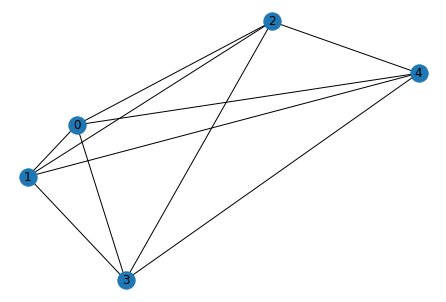

In [208]:
G = networkx.from_numpy_matrix(B)
position_dict = {}
for i in range(5):
    position_dict[i] = [x_vals[i], y_vals[i]]
nx.draw(G, with_labels = True, pos = position_dict)
print(type(G) )

In [209]:
for i in range(5):
    for j in range(5):
        if G.get_edge_data(i,j) !=None:
            print( "i=",i,"j=",j,G.get_edge_data(i,j)['weight'])

i= 0 j= 1 1.4142135623730951
i= 0 j= 2 4.47213595499958
i= 0 j= 3 3.1622776601683795
i= 0 j= 4 7.0710678118654755
i= 1 j= 0 1.4142135623730951
i= 1 j= 2 5.830951894845301
i= 1 j= 3 2.8284271247461903
i= 1 j= 4 8.246211251235321
i= 2 j= 0 4.47213595499958
i= 2 j= 1 5.830951894845301
i= 2 j= 3 5.830951894845301
i= 2 j= 4 3.1622776601683795
i= 3 j= 0 3.1622776601683795
i= 3 j= 1 2.8284271247461903
i= 3 j= 2 5.830951894845301
i= 3 j= 4 7.211102550927978
i= 4 j= 0 7.0710678118654755
i= 4 j= 1 8.246211251235321
i= 4 j= 2 3.1622776601683795
i= 4 j= 3 7.211102550927978


In [210]:
for i in range(5):
    for j in range(5):
        if (i!=j):
            if G.get_edge_data(i,j) !=None:
                if (G.get_edge_data(i,j)['weight']>5):
                    print("i=",i, "j=",j)
                    G.remove_edge(i,j)

i= 0 j= 4
i= 1 j= 2
i= 1 j= 4
i= 2 j= 3
i= 3 j= 4


In [211]:
for i in range(5):
    for j in range(5):
        print( "i=",i,"j=",j,G.get_edge_data(i,j))
# print( G.get_edge_data(2,1))           

i= 0 j= 0 None
i= 0 j= 1 {'weight': 1.4142135623730951}
i= 0 j= 2 {'weight': 4.47213595499958}
i= 0 j= 3 {'weight': 3.1622776601683795}
i= 0 j= 4 None
i= 1 j= 0 {'weight': 1.4142135623730951}
i= 1 j= 1 None
i= 1 j= 2 None
i= 1 j= 3 {'weight': 2.8284271247461903}
i= 1 j= 4 None
i=2 j= 0 {'weight': 4.47213595499958}
i= 2 j= 1 None
i= 2 j= 2 None
i= 2 j= 3 None
i= 2 j= 4 {'weight': 3.1622776601683795}
i= 3 j= 0 {'weight': 3.1622776601683795}
i= 3 j= 1 {'weight': 2.8284271247461903}
i= 3 j= 2 None
i= 3 j= 3 None
i= 3 j= 4 None
i= 4 j= 0 None
i= 4 j= 1 None
i= 4 j= 2 {'weight': 3.1622776601683795}
i= 4 j= 3 None
i= 4 j= 4 None


In [212]:
vertex = nx.algorithms.approximation.min_weighted_vertex_cover(G)
print(vertex)

{0, 1, 2, 4}


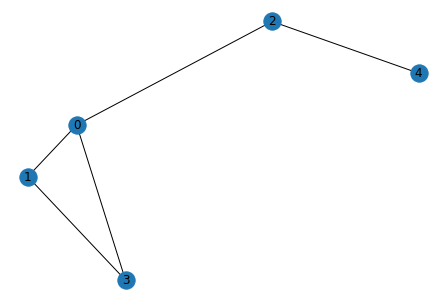

In [213]:
nx.draw(G, with_labels = True, pos = position_dict)

In [214]:
print(dominating_set(G))

{0, 4}


In [215]:
print (min_weighted_dominating_set(G))

{0, 1, 2}


In [216]:
list(G.nodes)

[0, 1, 2, 3, 4]

In [217]:
from random import choice
selected_nodes_list = []
while (G.number_of_nodes() > 0):
    all_nodes = list(G.nodes)
    n_old = len(all_nodes)
    print("no of nodes = ", n_old, " and they are ", all_nodes)
    selected_node = random.choice(all_nodes) 
    print("selected_node = ", selected_node)
    neigh = list(G.neighbors(selected_node))
    if len(neigh) == 0:
        print("node ", selected_node, " has no neighbor")
        selected_nodes_list.append(selected_node)
        G.remove_node(selected_node)
    
    else:
        print("neighbors = ", neigh)
        selected_nodes_list.append(selected_node)
        G.remove_node(selected_node)
        for i in neigh:
            G.remove_node(i)
            print("node ", i, " removed")
            # neigh = G.neighbors(selected_node)
            print("new n = ", G.number_of_nodes())

print("random selection has ", len(selected_nodes_list), " nodes and they are ", selected_nodes_list)

no of nodes =  5  and they are  [0, 1, 2, 3, 4]
selected_node =  0
neighbors =  [1, 2, 3]
node  1  removed
new n =  3
node  2  removed
new n =  2
node  3  removed
new n =  1
no of nodes =  1  and they are  [4]
selected_node =  4
node  4  has no neighbor
random selection has  2  nodes and they are  [0, 4]


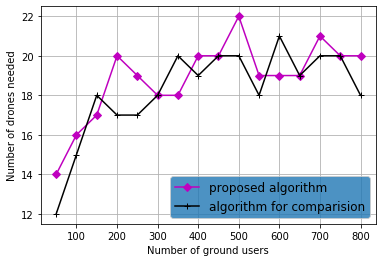

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
users = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800])
drones_1 = np.array([14, 16,17, 20, 19, 18, 18, 20, 20, 22, 19, 19, 19, 21, 20, 20])
drones_2 = np.array([12, 15, 18, 17, 17, 18, 20, 19, 20, 20, 18, 21, 19, 20, 20, 18])
# drones_2 = np.array([])
fig, ax1 = plt.subplots()
ax1.plot(users, drones_1, 'm', marker='D', label = 'proposed algorithm')
ax1.plot(users, drones_2, 'k', marker='+', label = 'algorithm for comparision')
legend = ax1.legend(loc='best', shadow=False, fontsize='large')
# plt.xlabel('Simulation Time')
plt.xlabel('Number of ground users')
plt.ylabel('Number of drones needed')
# ax1.set_xticks(T)
legend.get_frame().set_facecolor('C0')

plt.grid(True)
plt.show()